# Time series Information

A TS is said to stationary if its statistical properties such as mean, variance, remain constant over time. 

2 reasons that make TS non-stationary:
1. trend - varying mean over time. If we case the that on average, num of passengers growing over time.
2. seasonality - variations at specific time-frames, people have a tendency to buy cars in a particular month because of pay increment or festivals 

In [11]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

CSV file is USW00023243.csv which is from: https://www.ncei.noaa.gov/access/search/data-search/normals-hourly-1991-2020?dataTypes=HLY-CLOD-PCTCLR&dataTypes=HLY-CLOD-PCTFEW&dataTypes=HLY-CLOD-PCTSCT&dataTypes=HLY-CLOD-PCTBKN&dataTypes=HLY-CLOD-PCTOVC&dataTypes=HLY-CLDH-NORMAL&dataTypes=HLY-HTDH-NORMAL&dataTypes=HLY-DEWP-NORMAL&dataTypes=HLY-DEWP-10PCTL&dataTypes=HLY-DEWP-90PCTL&dataTypes=HLY-HIDX-NORMAL&bbox=37.975,-122.618,37.579,-122.222&startDate=2021-10-02T00:00:00&endDate=2021-10-02T00:00:59

January 1st, 24 hours

Information about flags page 2: https://www.ncei.noaa.gov/data/normals-hourly/1991-2020/doc/Normals_HLY_Documentation_1991-2020.pdf

In [23]:
#January 1st, 24 hours 
df = pd.read_csv("/Users/yukahatori/A_Fairness/USW00023234.csv", nrows = 24)

#drop columns we don't need
df.drop('STATION', axis=1, inplace=True)
df.drop('NAME', axis=1, inplace=True)
df.drop('LATITUDE', axis=1, inplace=True)
df.drop('LONGITUDE', axis=1, inplace=True)
df.drop('ELEVATION', axis=1, inplace=True)
df.drop('month', axis=1, inplace=True)
df.drop('hour', axis=1, inplace=True)
df.drop('day', axis=1, inplace=True)

#checks the flags and removes any rows corresponding with 'M' which means the data is missing
measurementFlags = list(df.filter(regex='meas'))
for flag in measurementFlags:
    df = df[~df[flag].str.contains('M')]

completenessFlags = list(df.filter(regex='meas'))
for flag in completenessFlags:
    df = df[~df[flag].str.contains('-9999')]
        
#get rid of all measurement and completeness flags
df = df[df.columns.drop(list(df.filter(regex='meas')))]
df = df[df.columns.drop(list(df.filter(regex='comp')))]

#rename columns
# df.columns = ['DATE', 'HLY_TEMP_NORMAL', 'years_HLY_TEMP_NORMAL', 'HLY_TEMP_10PCTL',
#        'years_HLY_TEMP_10PCTL', 'HLY_TEMP_90PCTL', 'years_HLY_TEMP_90PCTL',
#        'HLY_DEWP_NORMAL', 'years_HLY_DEWP_NORMAL', 'HLY_DEWP_10PCTL',
#        'years_HLY_DEWPv10PCTL', 'HLY_DEWP_90PCTL', 'years_HLY_DEWP_90PCTL',
#        'HLY_PRES_NORMAL', 'years_HLY_PRES_NORMAL', 'HLY_PRES_10PCTL',
#        'years_HLY_PRES_10PCTL', 'HLY_PRES_90PCTL', 'years_HLY_PRES_90PCTL',
#        'HLY_CLDH_NORMAL', 'years_HLY_CLDH_NORMAL', 'HLY_HTDH_NORMAL',
#        'years_HLY_HTDH_NORMAL', 'HLY_CLOD_PCTCLR', 'years_HLY_CLOD_PCTCLR',
#        'HLY_CLOD_PCTFEW', 'years_HLY_CLOD_PCTFEW', 'HLY_CLOD_PCTSCT',
#        'years_HLY_CLOD_PCTSCT', 'HLY_CLOD_PCTBKN', 'years_HLY_CLOD_PCTBKN',
#        'HLY_CLOD_PCTOVC', 'years_HLY_CLOD_PCTOVC', 'HLY_HIDX_NORMAL',
#        'years_HLY_HIDX_NORMAL', 'HLY_WCHL_NORMAL', 'years_HLY_WCHL_NORMAL',
#        'HLY_WIND_AVGSPD', 'years_HLY_WIND_AVGSPD', 'HLY_WIND_PCTCLM',
#        'years_HLY_WIND_PCTCLM', 'HLY_WIND_VCTDIR', 'years_HLY_WIND_VCTDIR',
#        'HLY_WIND_VCTSPD', 'years_HLY_WIND_VCTSPD', 'HLY_WIND_1STDIR',
#        'years_HLY-WIND-1STDIR', 'HLY_WIND_1STPCT', 'years_HLY_WIND_1STPCT',
#        'HLY_WIND_2NDDIR', 'years_HLY_WIND_2NDDIR', 'HLY_WIND_2NDPCT',
#        'years_HLY_WIND_2NDPCT']

df.columns = ['date', 'HLY_TEMP_NORMAL', 'years_HLY_TEMP_NORMAL', 'HLY_TEMP_10PCTL',
       'years_HLY_TEMP_10PCTL', 'HLY_TEMP_90PCTL', 'years_HLY_TEMP_90PCTL',
       'HLY_DEWP_NORMAL', 'years_HLY_DEWP_NORMAL', 'HLY_DEWP_10PCTL',
       'years_HLY_DEWPv10PCTL', 'HLY_DEWP_90PCTL', 'years_HLY_DEWP_90PCTL',
       'HLY_PRES_NORMAL', 'years_HLY_PRES_NORMAL', 'HLY_PRES_10PCTL',
       'years_HLY_PRES_10PCTL', 'HLY_PRES_90PCTL', 'years_HLY_PRES_90PCTL',
       'HLY_CLDH_NORMAL', 'years_HLY_CLDH_NORMAL', 'HLY_HTDH_NORMAL',
       'years_HLY_HTDH_NORMAL', 'HLY_CLOD_PCTCLR', 'years_HLY_CLOD_PCTCLR',
       'HLY_CLOD_PCTFEW', 'years_HLY_CLOD_PCTFEW', 'HLY_CLOD_PCTSCT',
       'years_HLY_CLOD_PCTSCT', 'HLY_CLOD_PCTBKN', 'years_HLY_CLOD_PCTBKN',
       'HLY_CLOD_PCTOVC', 'years_HLY_CLOD_PCTOVC', 'HLY_HIDX_NORMAL',
       'years_HLY_HIDX_NORMAL', 'HLY_WCHL_NORMAL', 'years_HLY_WCHL_NORMAL',
       'HLY_WIND_AVGSPD', 'years_HLY_WIND_AVGSPD', 'HLY_WIND_PCTCLM',
       'years_HLY_WIND_PCTCLM', 'HLY_WIND_VCTDIR', 'years_HLY_WIND_VCTDIR',
       'HLY_WIND_VCTSPD', 'years_HLY_WIND_VCTSPD', 'HLY_WIND_1STDIR',
       'years_HLY-WIND-1STDIR', 'HLY_WIND_1STPCT', 'years_HLY_WIND_1STPCT',
       'HLY_WIND_2NDDIR', 'years_HLY_WIND_2NDDIR', 'HLY_WIND_2NDPCT',
       'years_HLY_WIND_2NDPCT']
#DROPPING COLUMNS FOR TESTING
df = df.drop(columns=['HLY_TEMP_10PCTL',
       'years_HLY_TEMP_10PCTL', 'HLY_TEMP_90PCTL', 'years_HLY_TEMP_90PCTL',
       'HLY_DEWP_NORMAL', 'years_HLY_DEWP_NORMAL', 'HLY_DEWP_10PCTL',
       'years_HLY_DEWPv10PCTL', 'HLY_DEWP_90PCTL', 'years_HLY_DEWP_90PCTL',
       'HLY_PRES_NORMAL', 'years_HLY_PRES_NORMAL', 'HLY_PRES_10PCTL',
       'years_HLY_PRES_10PCTL', 'HLY_PRES_90PCTL', 'years_HLY_PRES_90PCTL',
       'HLY_CLDH_NORMAL', 'years_HLY_CLDH_NORMAL', 'HLY_HTDH_NORMAL',
       'years_HLY_HTDH_NORMAL', 'HLY_CLOD_PCTCLR', 'years_HLY_CLOD_PCTCLR',
       'HLY_CLOD_PCTFEW', 'years_HLY_CLOD_PCTFEW', 'HLY_CLOD_PCTSCT',
       'years_HLY_CLOD_PCTSCT', 'HLY_CLOD_PCTBKN', 'years_HLY_CLOD_PCTBKN',
       'HLY_CLOD_PCTOVC', 'years_HLY_CLOD_PCTOVC', 'HLY_HIDX_NORMAL',
       'years_HLY_HIDX_NORMAL', 'HLY_WCHL_NORMAL', 'years_HLY_WCHL_NORMAL',
       'HLY_WIND_AVGSPD', 'years_HLY_WIND_AVGSPD', 'HLY_WIND_PCTCLM',
       'years_HLY_WIND_PCTCLM', 'HLY_WIND_VCTDIR', 'years_HLY_WIND_VCTDIR',
       'HLY_WIND_VCTSPD', 'years_HLY_WIND_VCTSPD', 'HLY_WIND_1STDIR',
       'years_HLY-WIND-1STDIR', 'HLY_WIND_1STPCT', 'years_HLY_WIND_1STPCT',
       'HLY_WIND_2NDDIR', 'years_HLY_WIND_2NDDIR', 'HLY_WIND_2NDPCT',
       'years_HLY_WIND_2NDPCT'])
print("-------------------------------NEW COLUMNS-----------------------------")
print(df)
print('---------------------------------DESCRIBE------------------------------')
#describe
print(df.describe())


-------------------------------NEW COLUMNS-----------------------------
              date  HLY_TEMP_NORMAL  years_HLY_TEMP_NORMAL
0   01-01T00:00:00             48.8                     30
1   01-01T01:00:00             48.5                     30
2   01-01T02:00:00             47.6                     30
3   01-01T03:00:00             47.2                     30
4   01-01T04:00:00             46.8                     30
5   01-01T05:00:00             46.6                     30
6   01-01T06:00:00             46.6                     30
7   01-01T07:00:00             46.8                     30
8   01-01T08:00:00             47.2                     30
9   01-01T09:00:00             48.9                     30
10  01-01T10:00:00             50.5                     30
11  01-01T11:00:00             51.5                     30
12  01-01T12:00:00             52.4                     30
13  01-01T13:00:00             53.2                     30
14  01-01T14:00:00             53.8        

# Time series forecasting with Python using Autoregressive Moving Average (ARMA) models

Used to forecast a time series. These models combine autoregressive and moving average models. In moving average models, we assume that a variable is the sum of the mean of the time series and a linear combination of noise components.

The autoreggressive and moving average models can have different orders. 

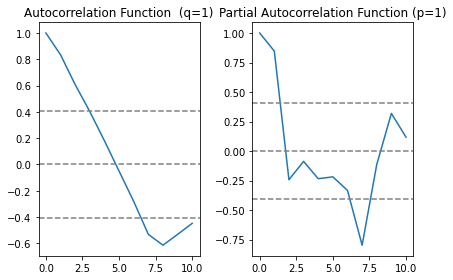

In [24]:
from statsmodels.tsa.stattools import acf, pacf

x = df["HLY_TEMP_NORMAL"].astype(float)

x_diff = x.diff().dropna() # first item is NA
# ACF and PACF plots:

lag_acf = acf(x_diff, nlags=10, fft=True)
lag_pacf = pacf(x_diff, nlags=10, method='ols')

#Plot ACF:
plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(x_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(x_diff)),linestyle='--',color='gray')
plt.title('Autocorrelation Function  (q=1)')

#Plot PACF:
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(x_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(x_diff)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function (p=1)')
plt.tight_layout()

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.79627D-01    |proj g|=  2.12612D-02

At iterate    5    f=  7.61703D-01    |proj g|=  4.72511D-05

At iterate   10    f=  7.61703D-01    |proj g|=  2.22045D-08

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     10     13      1     0     0   2.220D-08   7.617D-01
  F =  0.76170342090794063     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
                              ARMA Model Results                      

/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
 This problem is unconstrained.


Text(0.5, 1.0, 'RSS: 6.1688')

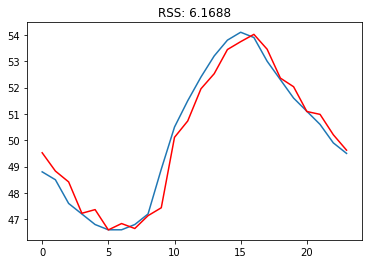

In [25]:
from statsmodels.tsa.arima_model import ARMA
# from statsmodels.tsa.arima.model import ARIMA

model = ARMA(x, order=(1, 1)).fit() # fit model

print(model.summary())
plt.plot(x)
plt.plot(model.predict(), color='red')
plt.title('RSS: %.4f'% sum((model.fittedvalues-x)**2))

In [41]:
import statsmodels.api as sm
print(df)

endog = df.loc[0:, 'HLY_TEMP_NORMAL']
print(df.columns)
cols = list(df.columns)
del cols[0:2]
print(df.loc([0:, 'HLY_TEMP_NORMAL']))
exog = sm.add_constant(df.loc([0:, cols]))
# exog = sm.add
# model = sm.tsa.SARIMAX(endog=series, exog=exog, order=order, seasonal_order=seasonal_order).fit(start_params=[0, 0, 0, 0, 0, 1])

# print(model.summary())
# plt.plot(x)
# plt.plot(model.predict(), color='red')
# plt.title('RSS: %.4f'% sum((model.fittedvalues-x)**2))

SyntaxError: invalid syntax (323191473.py, line 8)